## SVM Predictor

This notebook takes in normalized discrete wavelet transformed waveforms and a trained SVM model and outputs predicted data cleaning labels by the SVM. This notebook can also be used to double check that the SVM predictions are accurate. First, we load modules and files.

In [2]:
# Load modules

import time, pickle, json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set defaults for figures

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='bright')
plt.style.use('../clint.mpl')

# Load files

with open('../data/svm.sav', 'rb') as model:
    svm = pickle.load(model)
    
with open('../data/p03_r003_test_data.pickle', 'rb') as data:
    data_dict = pickle.load(data)

Now we load waveforms and predict SVM labels.

In [4]:
dwts_norm = data_dict['dwt_norm']
wfs_norm = data_dict['wf_norm']

start_time = time.time()
svm_labels = svm.predict(dwts_norm)
print("--- %s seconds elapsed ---" % (time.time() - start_time))

--- 2.151721954345703 seconds elapsed ---


Here we load all other parameters into a pandas DataFrame.

In [5]:
del data_dict['dwt_norm']
del data_dict['wf_norm']
df = pd.DataFrame.from_dict(data_dict, orient='columns')

This cell plots category statistics in the dataset. For background data, noise/baseline events will usually dominate.

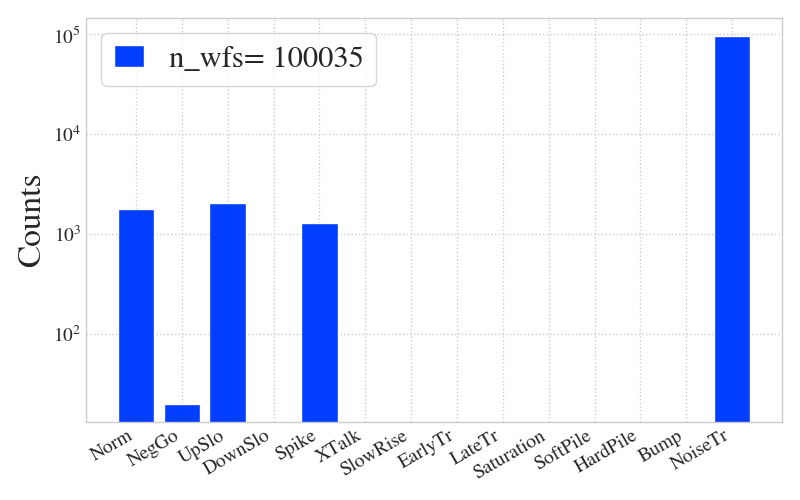

In [6]:
categories = ['Norm', 'NegGo', 'UpSlo', 'DownSlo', 'Spike', 
              'XTalk', 'SlowRise', 'EarlyTr', 'LateTr', 'Saturation', 
              'SoftPile', 'HardPile', 'Bump', 'NoiseTr']

n_bins = int(len(categories))
hist, bins = np.histogram(svm_labels, bins=n_bins)

%matplotlib widget
plt.bar(categories, hist, label=f'n_wfs= {len(svm_labels)}')
plt.xticks(categories, rotation=30, ha='right')
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(fontsize=22, loc='best')

In the following cells we look at the energy spectrum and sample waveforms in each category. This helps us double check that the SVM is placing waveforms in the category they belong.

In [13]:
tag = 1
tag_cut = (svm_labels == tag)
energy_cut = df['cuspEmax_ctc_cal'][tag_cut]

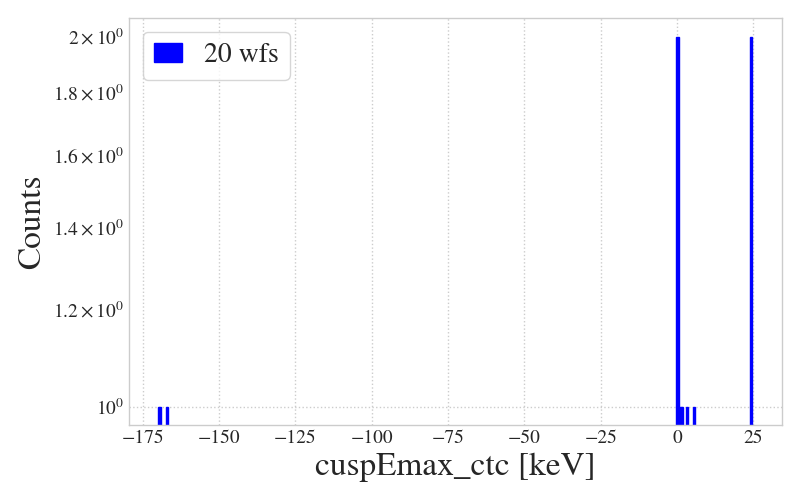

In [14]:
%matplotlib widget

fig, ax = plt.subplots(1,1)
ax.hist(energy_cut, bins=250, label =f'{energy_cut.shape[0]} wfs', color='blue', ec="blue")

plt.xlabel('cuspEmax_ctc [keV]', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(loc='best', fontsize=20, fancybox=True)

(20,)


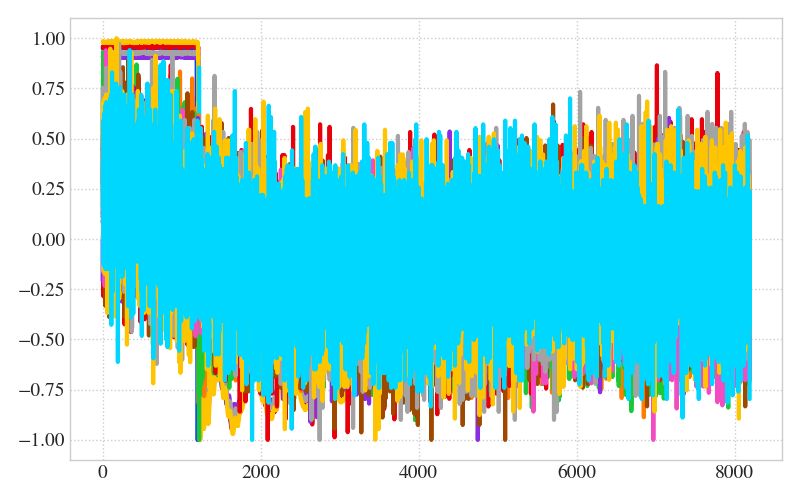

In [15]:
samples = np.where(tag_cut)[0]
print(samples.shape)

%matplotlib widget
for i in samples[0:50]:
    plt.plot(wfs_norm[i]) 

Finally, we save the predicted labels onto the test dataset.

In [17]:
data_dict['svm_label'] = svm_labels
data_dict['dwt_norm'] = dwts_norm
data_dict['wf_norm'] = wfs_norm
with open('../data/p03_r003_test_data.pickle', 'wb') as out_data:
    pickle.dump(data_dict, out_data)